# **Project Name**    - Yes Bank Stock Closing Price Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual

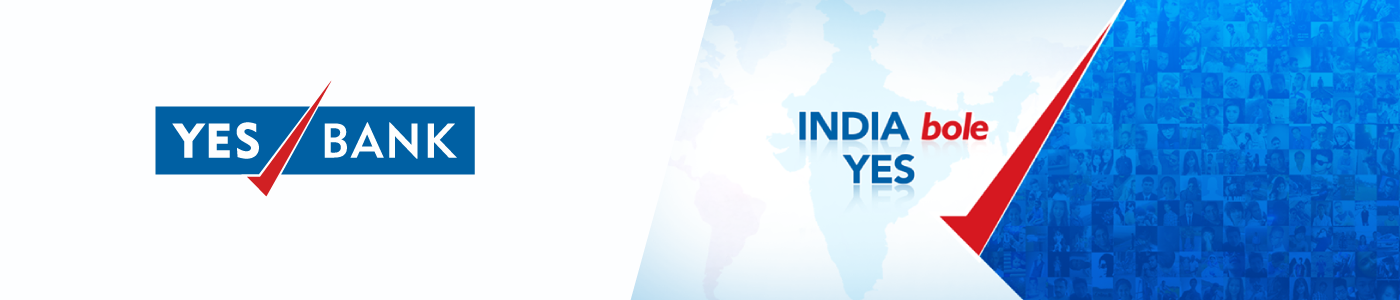

# **Project Summary -**

The Yes Bank Monthly Closing Price Prediction Capstone Project aims to predict the monthly closing price of Yes Bank's stock using historical stock market data. The project uses various machine learning algorithms to analyze and predict the stock price.

The first step in the project is data preprocessing, where the historical stock market data is collected and cleaned. The dataset contains the stock price for each month along with various financial indicators like the opening price, closing price etc.

Next, the data is split into training and testing sets, and various machine learning models are trained on the training set. The models used in this project include Linear Regression, Ridge Regression, Lasso Regression and Elastic Net Regression.

Once the models are trained, they are evaluated on the testing set using various evaluation metrics like Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-Squared (R2) score. The model with the lowest RMSE and MAE and the highest R2 score is selected as the final model.

Finally, the selected model is used to predict the monthly closing price for the next months, and the results are visualized using various charts and graphs.


# **GitHub Link -**

https://github.com/biswa2594/Yes-Bank-Stock-Closing-Price-Prediction.git

# **Problem Statement**

**The main objective is to predict Yes Bank stock's closing price of the month**

# ***Let's Begin !***

## ***1. Know Your Data***

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.

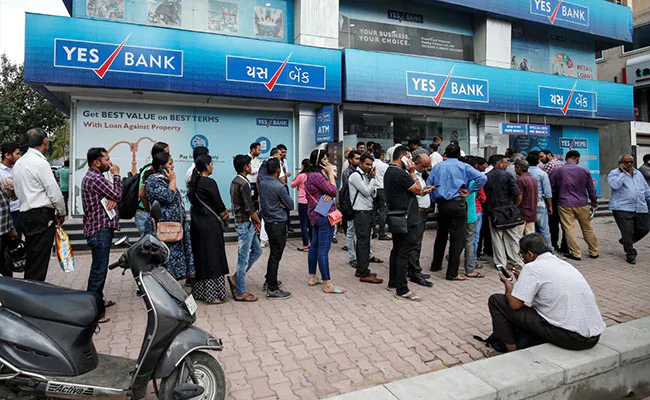

**Let's Get familiar with whats does the term stock means?**

In finance, the term "stock" refers to a share in the ownership of a company. When a company decides to raise funds, it can do so by issuing stocks, which are also known as "shares" or "equity." Each share represents a small piece of ownership in the company.

Investing in stocks can be a way to potentially earn a return on your investment, but it also comes with risks. The value of a stock can go up or down, and there is no guarantee that you will make a profit. It's important to do your research and understand the risks before investing in any stock.

Since, we've the YES BANK Stock price dataset which has the monthly stock prices. It contains the following features:

**Open** - The opening price is the price at which the first trade for the day occurs. It is the price at which the stock is first bought or sold when the market opens for trading.

**High** - The high is the highest price at which a stock traded during a period.

**Low** -The low is the highest price at which a stock traded during a period.

**Close** -The closing price of a stock refers to the last price at which a stock was traded during a regular trading session. It is the final price at which a stock was bought or sold before the market closes for the day. The closing price is calculated  based on the weighted average price of the last half-hour of trading.

### Import Libraries

In [32]:
#installing neccesary libraries
!pip install --upgrade mplfinance 
#for creating visualizations of financial data. It is built on top of the Matplotlib library and provides a simple and easy-to-use interface for creating candlestick charts, OHLC charts, and other financial plots.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
# importing the neccesary libraries
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import *
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [34]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
#importing the dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project 2/data_YesBank_StockPrices.csv')

### Dataset First View

In [36]:
# Dataset First Look
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [37]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [38]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


Date column is in string format, need to handle this attribute 

#### Duplicate Values

In [39]:
# Check Dataset for Duplicate Value Count if have any
df.duplicated().value_counts()

False    185
dtype: int64

we clearly see there are no null values/duplicate values in the dataset

## ***2. Understanding Your Variables***

In [40]:
#Columns present in the dataset
df.columns 

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [41]:
#checking description 
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


we can see all the parameter closely related to each other

### Variables Description 

Date - Date of record

Open - Opening price of the  month

High - Highest price of the month

Low - Lowest Price of the month

Close - Closing price of the month

## ***3. Data Wrangling***

In [42]:
from datetime import datetime
df['Date'] =df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y'))
df['Date'] = df['Date'].dt.strftime('%Y-%m')
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


we sucessfully handle the  Date attribute 

In [43]:
# Setting Date column as index
df = df.set_index('Date')
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


Stock data is typically a time-series, meaning that the data points are ordered chronologically. Using the date column as the index ensures that the data is ordered correctly, which is important for many machine learning models that rely on time-series data.

In [44]:
#Shifting our data by 1
df = df.shift(1)
df

,Open,High,Low,Close
Date,,,,
2005-07-01,NaN,NaN,NaN,NaN
2005-08-01,13.00,14.00,11.25,12.46
2005-09-01,12.58,14.88,12.55,13.42
2005-10-01,13.48,14.87,12.27,13.30
2005-11-01,13.20,14.47,12.40,12.99
...,...,...,...,...
2020-07-01,27.75,31.95,25.55,25.60
2020-08-01,25.60,28.30,11.10,11.95
2020-09-01,12.00,17.16,11.85,14.37


Shifting the stock data can be useful for creating time-based analysis, feature engineering, and prediction by comparing data points across time or creating lagged variables.

## ***4. Data Vizualization, Storytelling & Experimenting with charts***

### Technical Data Analysis

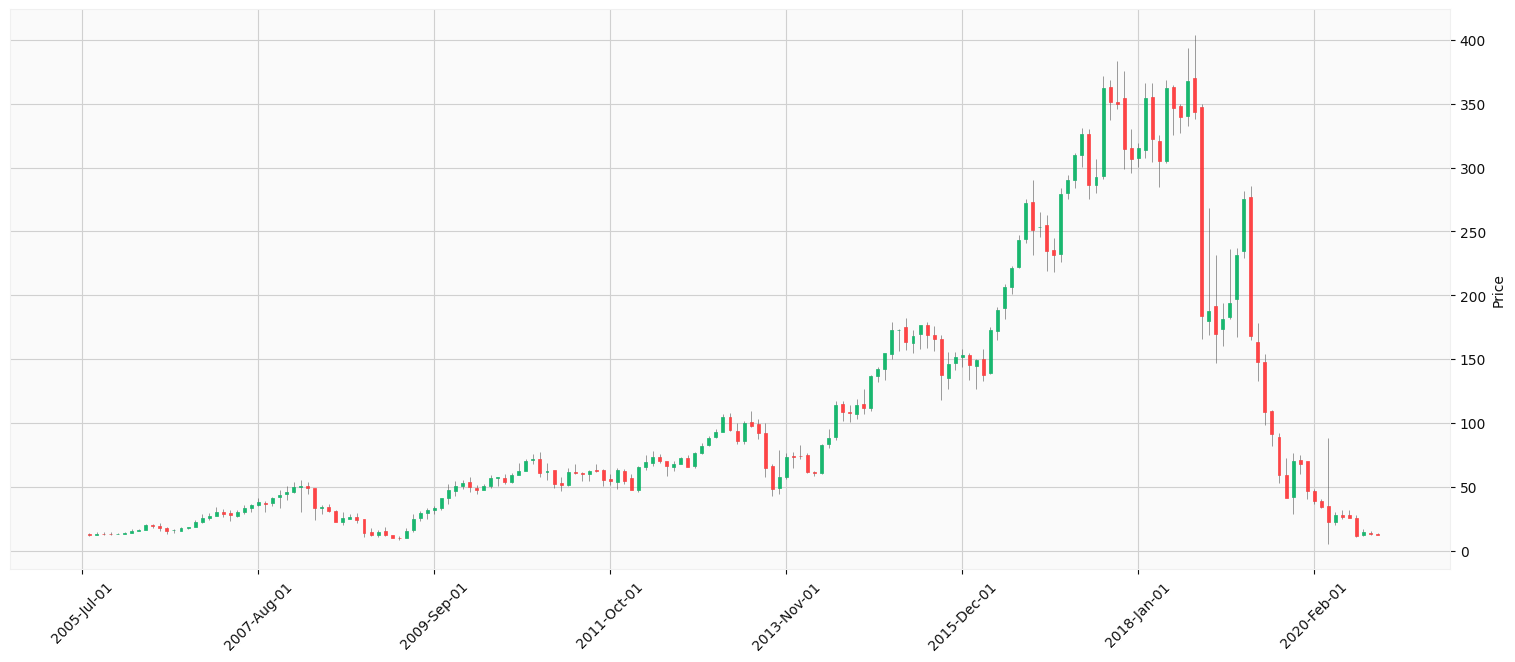

In [45]:
#lets plot the data
mpf.plot(df,type='candle', style ='yahoo',figsize=(20,8))

we can see from this candlestick chart the stock prize was heavily manipulated from Dec 2015, there are many possible reason to this,there might be some fundamental news envolved.

Lets plot Candlestick chart for better understanding with the help of MA indicator.

 Moving average (MA) used to help smooth out price data by creating a constantly updated average price.

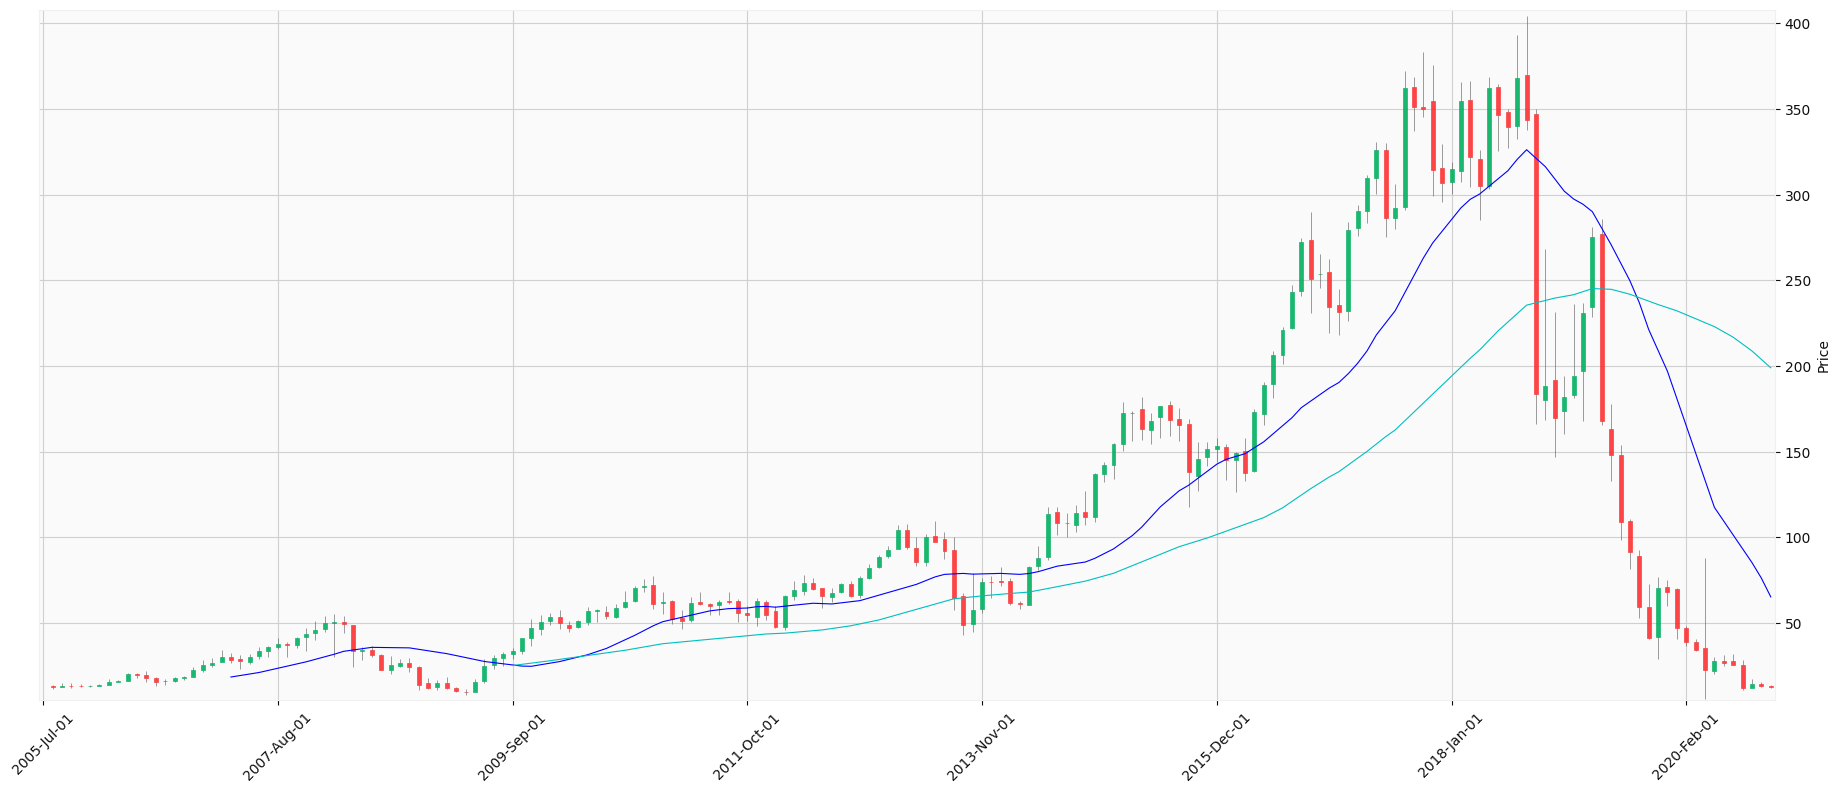

In [46]:
#Plotting candlestick pattern with MA
mpf.plot(df,type='candle',
         mav=(20,50),style='yahoo',
         tight_layout= True,figratio =(48,24),
         mavcolors = ('b','c'),
         figsize=(20,8))

lets point few point from this chart
An MA with a short time frame will react much quicker to price changes than an 

*   MA with a long look-back period. In the above chart we can see the 20 moving average more closely tracks the actual price than the 50 moving average does
*  The 10MA may be of analytical benefit to a shorter-term trader since it follows the price more closely and therefore produces less lag than the longer-term moving average. A 50 MA may be more beneficial to a longer-term trader.
*   From Sep 2014 to March 2015 market tried to break 20MA but failed bulls enter into market and  make higher high
*   Eventually around Jan 2018 bears take the wheels also bulls tried to gain control but failed and Oct 2018 bears able to take down stock prize more than 60% down.

*  Again in early 2019 bulls tried to regain but failed to take down bears.

*   After failing to claim the 20 moving average support, the price further more dumped again, breaking the 50 moving average, thus there was no support confirmation for a bullish reversal

Let's have a look at the line graph of closing price of each month

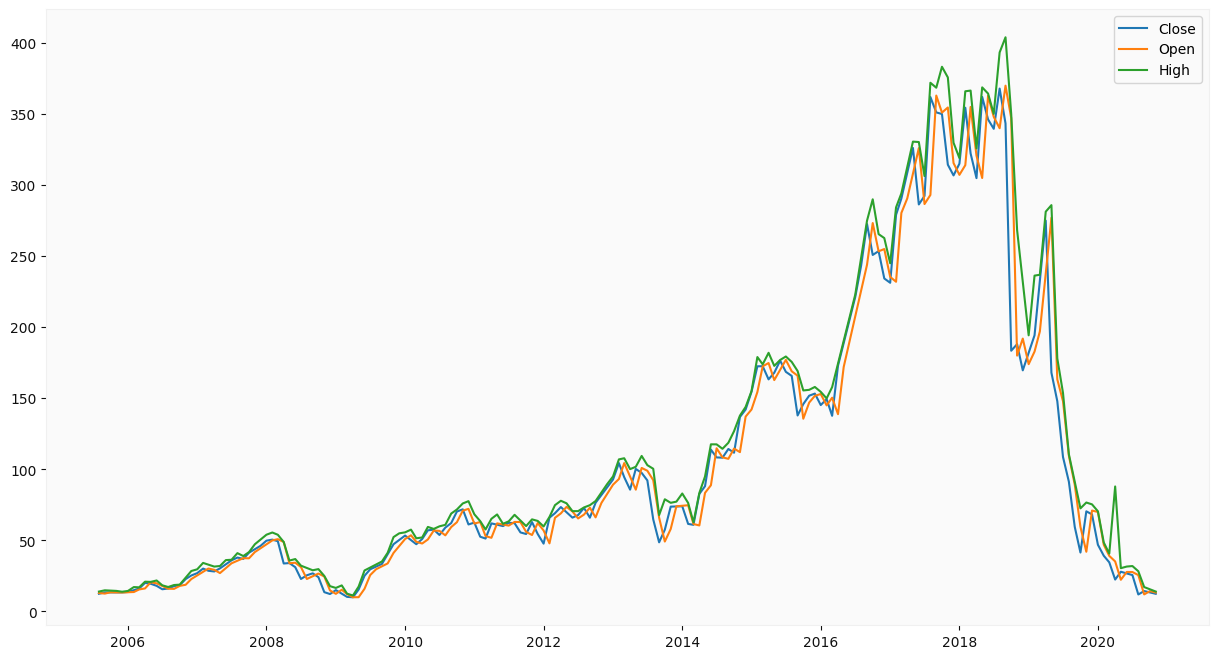

In [47]:
# Line Plot
plt.figure(figsize=(15,8))
plt.plot(df['Close'])
plt.plot(df['Open'])
plt.plot(df['High'])
plt.legend(['Close','Open','High'])
plt.grid()



*  we can see mid 2017 to mid 2018 bulls are forming multiple tops betwen the range of 350 to 370 but failed to break support 
*    it appears that none of the features have a normal distribution since their means are all greater than their medians. To address this, we can apply a logarithmic transformation to the columns to try and normalize the distribution of the data.



###**Lets plot few indicators for better understanding**

#####Simple Moving Average 

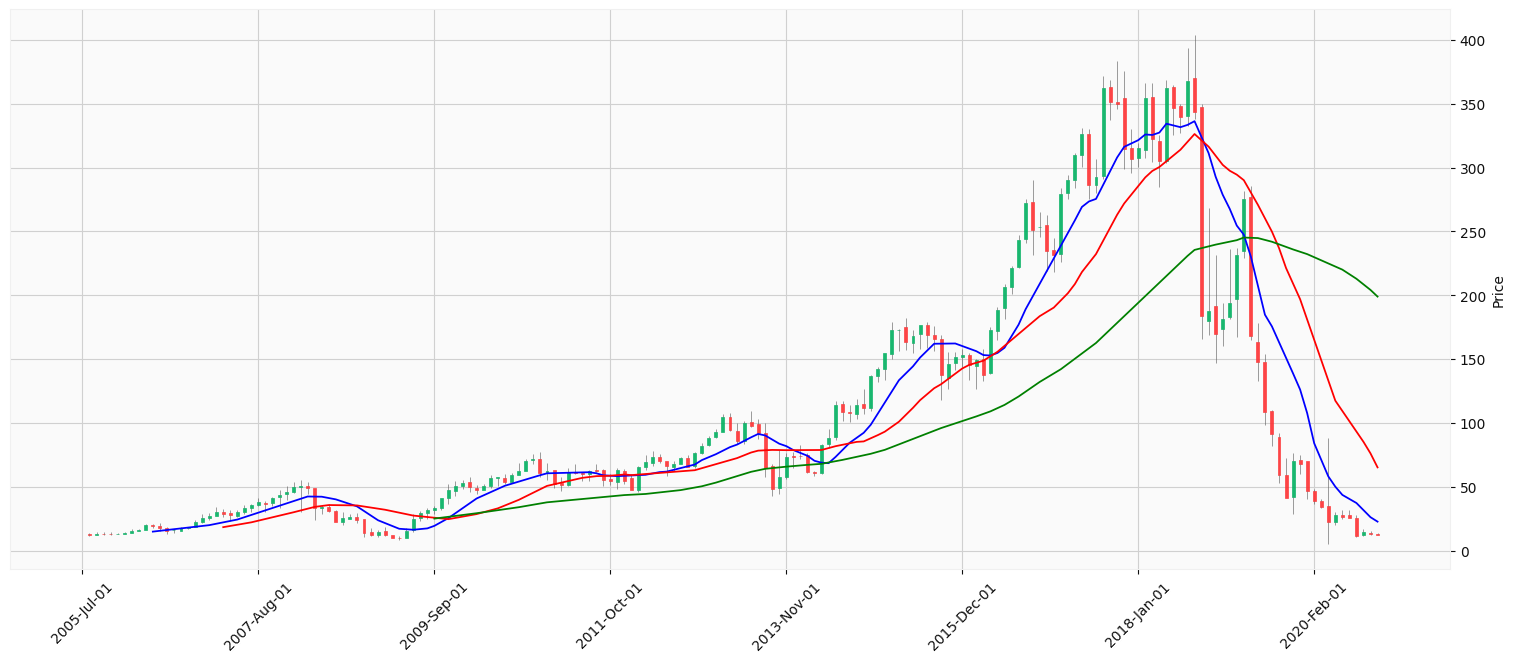

In [48]:
# Calculate the moving averages
sma_10 = df['Close'].rolling(window=10).mean()
sma_20= df['Close'].rolling(window=20).mean()
sma_50= df['Close'].rolling(window=50).mean()


# Plot the candlestick chart with the moving averages and legend
mpf.plot(df, style='yahoo', type='candle', 
         addplot=[mpf.make_addplot(sma_10, color='b'),
                  mpf.make_addplot(sma_20, color='r'),
                  mpf.make_addplot(sma_50, color='g')],
          figsize=(20,8)
         )

We can see that the moving average bands are acting as a support and resistance from time to time in the charts.

#####MACD

In [49]:
#Calculaating MACD and its signal
shortEMA = df['Close'].ewm(span=12,adjust=False).mean()
longEMA = df['Close'].ewm(span=26,adjust=False).mean()
MACD = shortEMA - longEMA
signal=MACD.ewm(span=9,adjust=False).mean()
df['macd'] = MACD
df['macd_signal']=signal


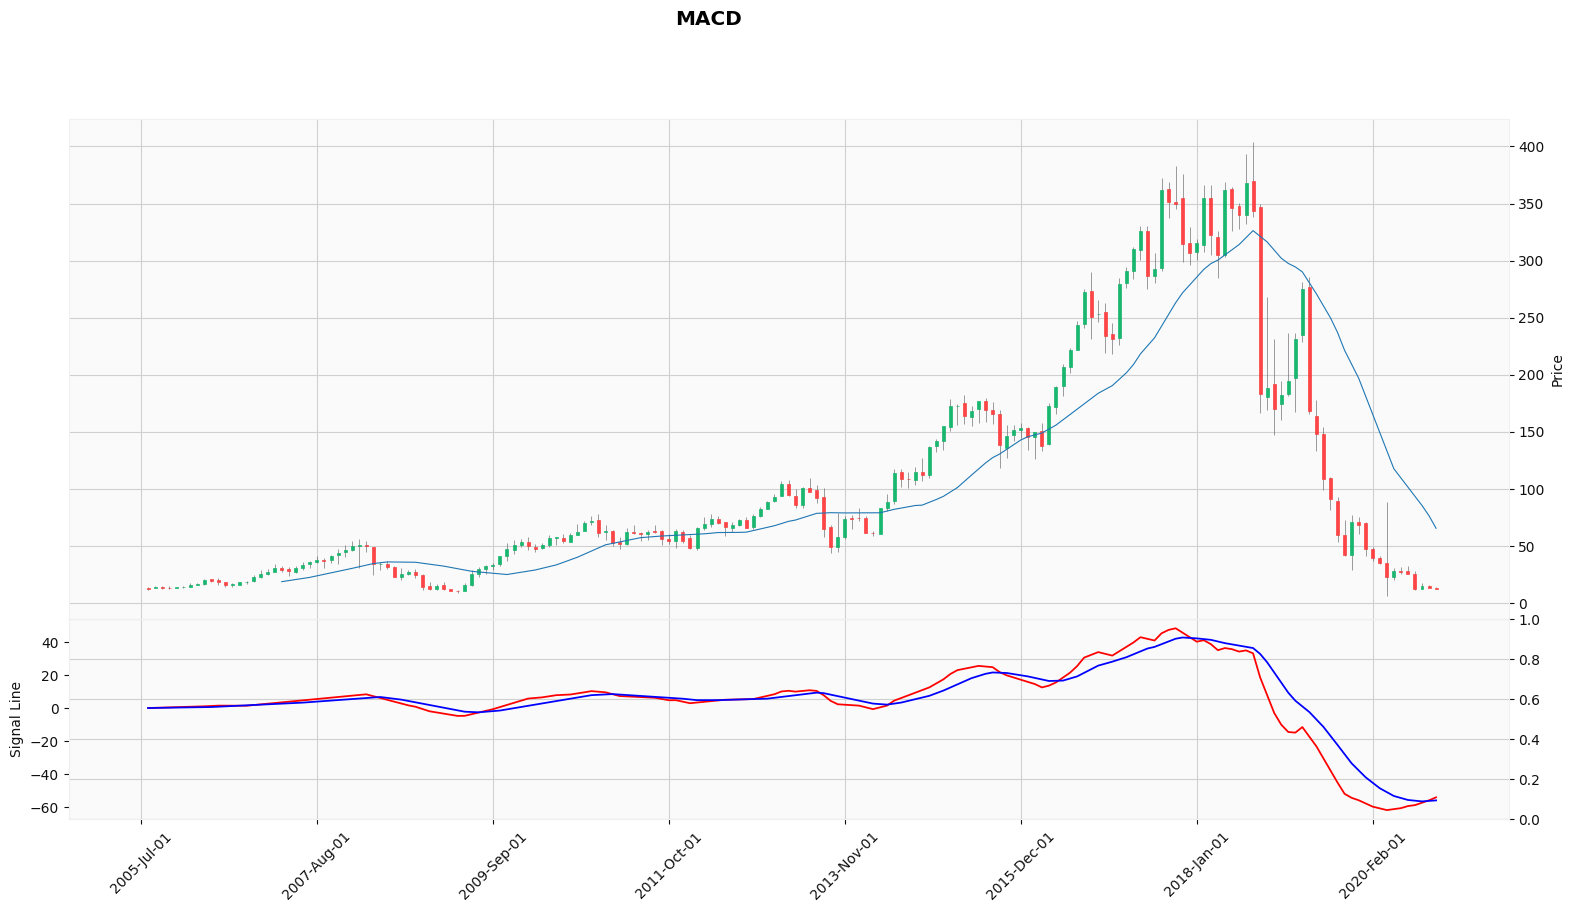

In [50]:
# Plot the data and MACD indicator using mpf

macd_plot = mpf.make_addplot(MACD, panel=1, color='red', secondary_y=True, ylabel='MACD')

signal_plot = mpf.make_addplot(signal, panel=1, color='blue', secondary_y=True, ylabel='Signal Line')


mpf.plot(df, type='candle', style='yahoo', title='MACD', mav=(20),
         addplot=[macd_plot, signal_plot],
         figsize=(20,10))
mpf.show()

being a lagging indicator, it change with current price action.
we can see from above that MACD experienced highly volatile data

#####RSI

In [51]:
# Calculate the RSI
delta = df['Close'].diff()
gain = delta.mask(delta < 0, 0)
loss = -delta.mask(delta > 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
df['rsi']=rsi

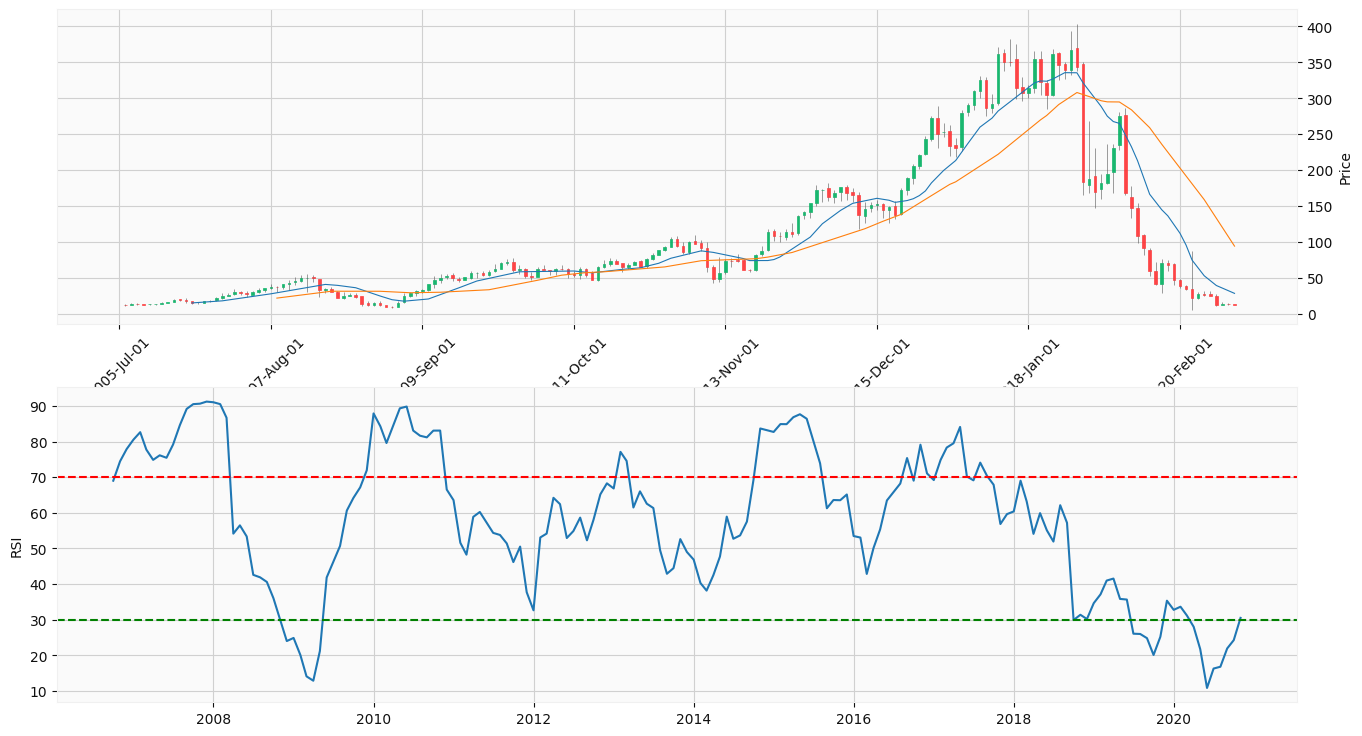

In [52]:
# Plot the data and RSI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

mpf.plot(df, ax=ax1, type='candle', style='yahoo', mav=(12,26))
ax2.plot(rsi)
ax2.axhline(70, linestyle='--', color='red')
ax2.axhline(30, linestyle='--', color='green')
ax2.set_ylabel('RSI')
plt.show()

The Relative Strength Index (RSI) is a momentum oscillator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in an asset. The RSI ranges from 0 to 100, where readings above 70 are considered overbought and readings below 30 are considered oversold.

Points we can get from an RSI chart


*  When the RSI is overbought and starts to decline, it may signal that the uptrend is weakening, and a downtrend may be starting. Similarly, when the RSI is oversold and starts to rise, it may signal that the downtrend is weakening, and an uptrend may be starting.
*   When the RSI is consistently above 50, it indicates that the bullish momentum is stronger than bearish momentum, and the price is likely to continue its upward trend. Conversely, when the RSI is consistently below 50, it indicates that the bearish momentum is stronger, and the price is likely to continue its downward trend.

*   in 2020 recent the price is making new lows, but the RSI is not making new lows, it indicates a bullish divergence and suggests that the downtrend may be weakening



#####Stochastic oscillator

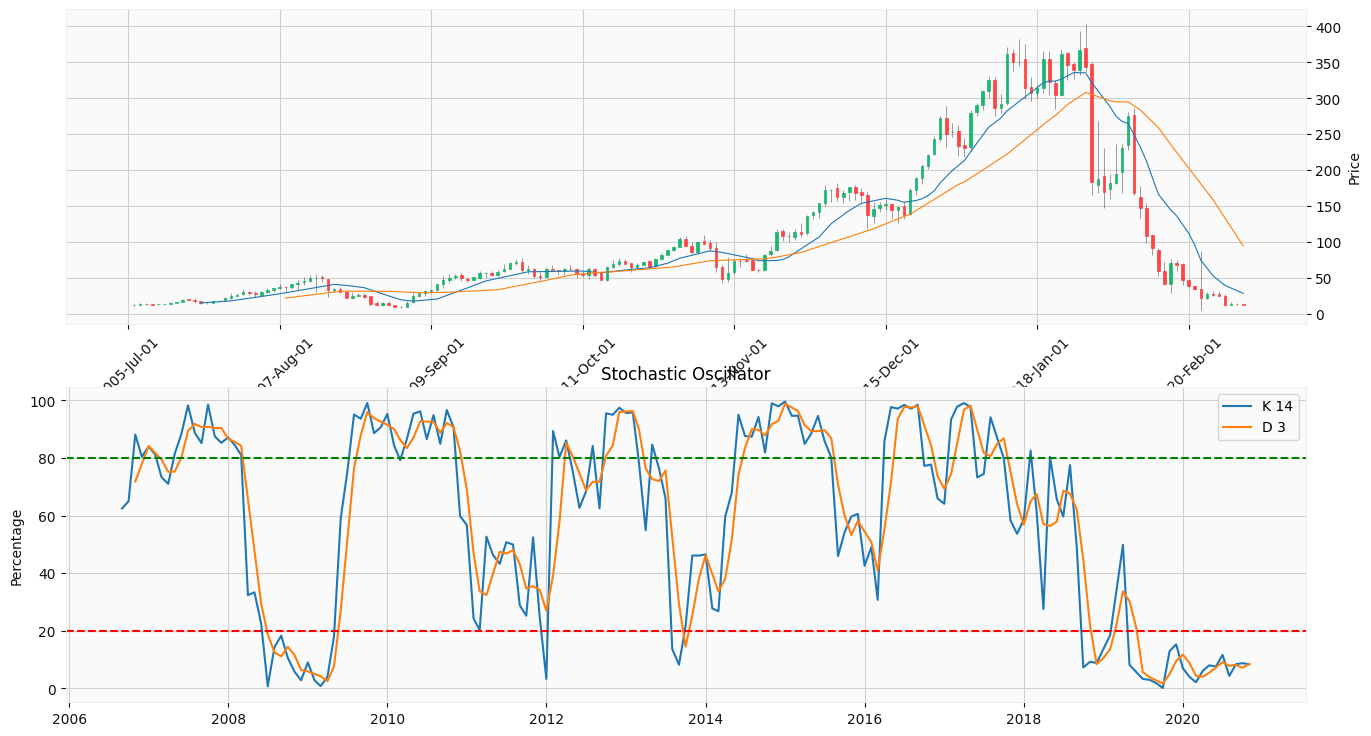

In [53]:
# Calculate the Stochastic Oscillator
k_period = 14
d_period = 3

lowest_low = df['Low'].rolling(window=k_period).min()
highest_high = df['High'].rolling(window=k_period).max()

k_percent = 100 * ((df['Close'] - lowest_low) / (highest_high - lowest_low))
d_percent = k_percent.rolling(window=d_period).mean()

# Plot the data and Stochastic Oscillator
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))
mpf.plot(df,ax=ax1,type='candle',style='yahoo',mav=(12,26))
ax2.plot(k_percent, label='K %d' % k_period)
ax2.plot(d_percent, label='D %d' % d_period)
ax2.axhline(20, linestyle='--', color='red')
ax2.axhline(80, linestyle='--', color='green')
ax2.legend()
ax2.set_ylabel('Percentage')
plt.title('Stochastic Oscillator')
plt.show()

Stochastic oscillators measure the momentum of an asset's price to determine trends and predict reversals. Stochastic oscillators measure recent prices on a scale of 0 to 100, with measurements above 80 indicating that an asset is overbought and measurements below 20 indicating that it is oversold.

from above fig we can say that the price is oversold

#####Bollinger bands

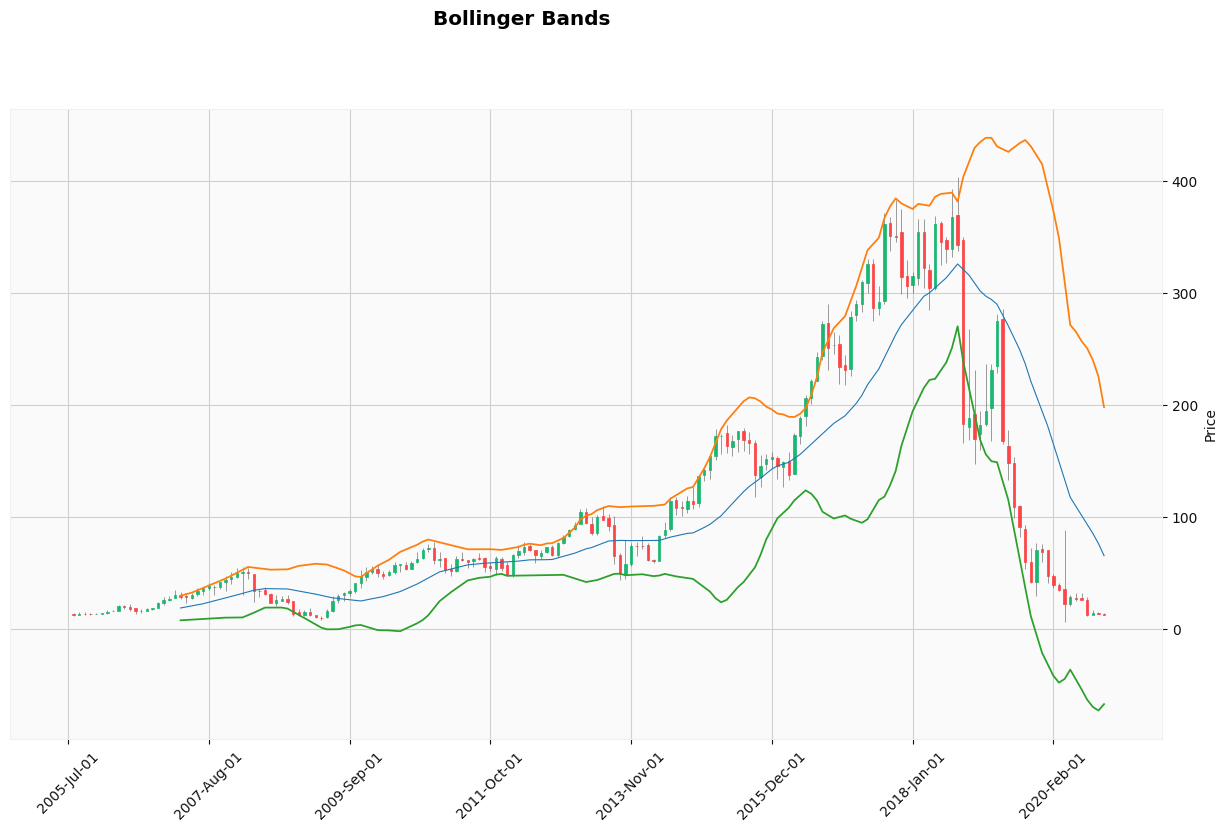

In [54]:
# Set the window and number of standard deviations for Bollinger Bands
window = 20
std = 2

# Calculate the rolling mean and standard deviation
rolling_mean = df['Close'].rolling(window=window).mean()
rolling_std = df['Close'].rolling(window=window).std()

# Calculate the upper and lower Bollinger Bands
upper_band = rolling_mean + (rolling_std * std)
lower_band = rolling_mean - (rolling_std * std)

# Plot the data and Bollinger Bands using mpf
mpf.plot(df,style='yahoo', type='candle', mav=(window), title='Bollinger Bands', 
         addplot=[mpf.make_addplot(upper_band), mpf.make_addplot(lower_band)],
         figsize=(16,9))
mpf.show()


Bollinger bands based on price volatility they won't stay a constant difference from the moving average. If volatility drops the bolinger bands will get tighter and if market movements get bigger  if we see bigger swings the bolinger band will widen.
we can say when the bands are quite far apart at an extreme then the current trend may be ending and alternatively when the bands has narrowed to far, market volatility is really low we're about to have an explosive move.

#####Fibonacci retracement

In [55]:
# Calculate the Fibonacci retracement levels
high = df['High'].max()
low = df['Low'].min()

diff = high - low
levels = [0, 0.236, 0.382, 0.5, 0.618, 0.786, 1.0]

fib_levels = []
for level in levels:
    fib_levels.append(high - (diff * level))

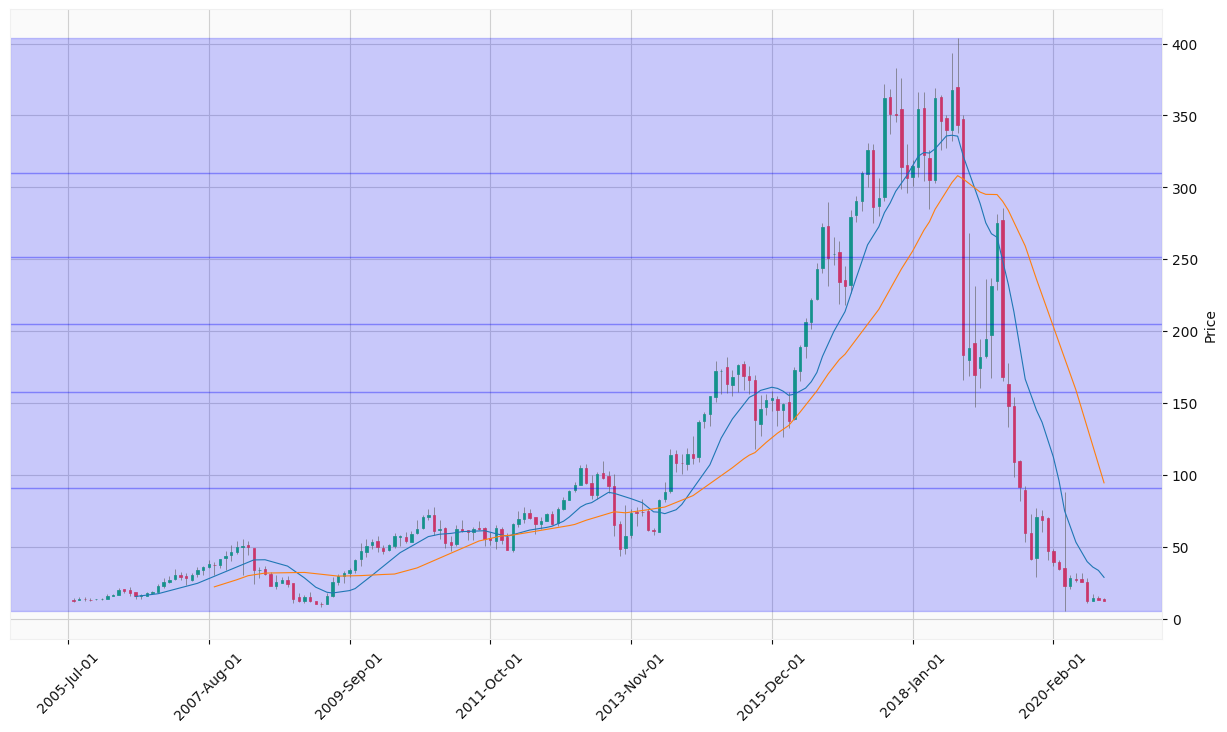

In [56]:
# Plot the data and Fibonacci retracement levels
fig,axes = mpf.plot(df, type='candle', style='yahoo', mav=(12,26),
         panel_ratios=(1,), returnfig=True,
         figsize=(16,9))

# Plot the Fibonacci retracement levels
for i in range(len(fib_levels) - 1):
    axes[0].axhspan(fib_levels[i], fib_levels[i+1], alpha=0.2, color='blue') 
#use alpha=0.2 to make the bands semi-transparent, so that they don't obscure the candlestick chart
plt.show()

Fibonacci retracement levels are horizontal lines that indicate the possible locations of support and resistance levels. Each level is associated with one of the above ratios or percentages. It shows how much of a prior move the price has retraced. The direction of the previous trend is likely to continue.

## ***5. Hypothesis Testing***

### Hypothetical Statement -1

####   Does the relative strength index (RSI) provide a significant improvement in predicting the closing price of a particular bank stock compared to a random walk model?

Null hypothesis H0: There is no significant difference in the predictive power of the RSI and a random walk model on the closing price of the stock,

Alternative hypothesis H1: The RSI provides a significant improvement in predicting the closing price of the  stock compared to a random walk mode

In [57]:
pip install ta==0.10.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import ta

##### Perform an appropriate statistical test

In [59]:
# calculate random walk predictions
rw_predictions = df['Close'].shift(1)
# shifts the closing prices by one time period to create the predictions for a random walk model

In [60]:
# calculate RSI predictions (using a simple rule-based strategy)
rsi_predictions = df['Close'].where(df['rsi'] > 50, df['Close'].shift(1)).where(df['rsi'] < 50, df['Close'].shift(1))

# calculate prediction errors
rsi_errors = df['Close'] - rsi_predictions
rw_errors = df['Close'] - rw_predictions


# perform paired t-test on prediction errors
t_stat, p_val = ttest_rel(rsi_errors, rw_errors)


# print results
if p_val < 0.05:
    print("Reject null hypothesis.")
else:
    print("Fail to reject null hypothesis.")

Fail to reject null hypothesis.


From this testing we can conlude that there is no significant difference in the predictive power of the RSI and a random walk model on the closing price of the stock.

##### Which statistical test have you done to obtain P-Value?

 A paired t-test was performed to obtain the P-value.


##### Why did you choose the specific statistical test?

1. The RSI and random walk models are applied to the same set of data, and the prediction errors are calculated for each model on the same set of observations. Therefore, the data is paired, and a paired test is appropriate

2. I wanted to test whether there is a significant difference between the mean prediction errors of the RSI and random walk models. The paired t-test is designed to test the difference between the means of the paired data.

### Hypothetical Statement -2

####  Does the MACD indicator provide a significant improvement in predicting the closing price of a particular bank stock compared to a simple moving average strategy?

Null hypothesis H0: There is no significant difference in the predictive power of the MACD indicator and a simple moving average strategy on the closing price of the stock.

Alternative hypothesis H1: The MACD indicator provides a significant improvement in predicting the closing price of the stock compared to a simple moving average strategy

##### Perform an appropriate statistical test

In [61]:
# generate predictions using MACD and SMA strategies
df['macd_pred'] = df['Close'] + df['macd_signal']
df['sma'] = df['Close'].rolling(window=14).mean()
df['sma_pred'] = df['sma'].shift(1)

In [62]:
# calculate prediction errors
macd_errors = df['macd_pred'] - df['Close']
sma_errors = df['sma_pred'] - df['Close']

In [63]:
# perform paired t-test
t_stat, p_val = ttest_rel(macd_errors, sma_errors)

# print results
if p_val < 0.05:
    print("Reject null hypothesis.")
else:
    print("Fail to reject null hypothesis.")

Fail to reject null hypothesis.


From above test you can see there is no significant difference in the predictive power of the MACD indicator and a simple moving average strategy on the closing price of the bank stock.

##### Which statistical test have you done to obtain P-Value?

A paired t-test was performed to obtain the P-value.

we can then use the resulting p-value to determine whether to reject or fail to reject the null hypothesis

##### Why did you choose the specific statistical test?

The paired t-test is a parametric test that assumes that the differences between the paired measurements follow a normal distribution.

 the paired t-test is a useful and widely-used statistical test for comparing paired data and testing hypotheses about the difference between two means.

## ***6. Feature Scaling & Transformation***

### **Preparing the Data for ML algorithms

In [64]:
df.head()

,Open,High,Low,Close,macd,macd_signal,rsi,macd_pred,sma,sma_pred
Date,,,,,,,,,,
2005-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-08-01,13.00,14.00,11.25,12.46,0.000000,0.000000,NaN,12.460000,NaN,NaN
2005-09-01,12.58,14.88,12.55,13.42,0.076581,0.015316,NaN,13.435316,NaN,NaN
2005-10-01,13.48,14.87,12.27,13.30,0.126135,0.037480,NaN,13.337480,NaN,NaN
2005-11-01,13.20,14.47,12.40,12.99,0.138793,0.057743,NaN,13.047743,NaN,NaN


In [65]:
df.describe()

,Open,High,Low,Close,macd,macd_signal,rsi,macd_pred,sma,sma_pred
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,170.000000,184.000000,171.000000,170.000000
mean,106.047554,116.654348,95.397500,105.696739,4.613487,5.831341,57.905484,111.528080,112.327277,112.796580
std,98.909042,106.359416,91.262484,98.624095,23.265438,20.010506,20.504832,113.546879,93.955040,94.031371
min,10.000000,11.240000,5.550000,9.980000,-61.893724,-56.617094,10.876419,-44.429462,15.568571,15.568571
25%,33.867500,36.320000,28.877500,33.495000,0.651942,1.110581,42.667099,31.168258,38.898214,39.019286
50%,62.990000,72.870000,58.210000,62.720000,5.470370,5.228458,59.287736,69.569097,76.275000,77.050357
75%,153.350000,170.092500,139.195000,153.617500,12.775943,14.820786,74.763913,168.857119,158.678214,158.803036
max,369.950000,404.000000,345.500000,367.900000,48.371101,42.778886,91.200951,405.086998,338.575714,338.575714


In [66]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'macd', 'macd_signal', 'rsi',
       'macd_pred', 'sma', 'sma_pred'],
      dtype='object')

Let's drop the columns we don't need for machine learning

In [67]:
#dropping unnecessary columns
df.drop(columns=['macd_signal',
       'macd_pred', 'sma_pred'],inplace=True)

In [68]:
# checking for null values
df.isnull().sum()

Open      1
High      1
Low       1
Close     1
macd      1
rsi      15
sma      14
dtype: int64

we can see there are few null values after adding more features 

In [69]:
#dealing with null values
feature = df.describe()
for col in feature:
  df[col].fillna(df[col].mean(),inplace = True)

we only had 185 rows so dropping this null values not a good idea, woud have resulted significant loss of data, so instead of removing replaced by the mean of those columns

In [70]:
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
macd     0
rsi      0
sma      0
dtype: int64

###distribution check 

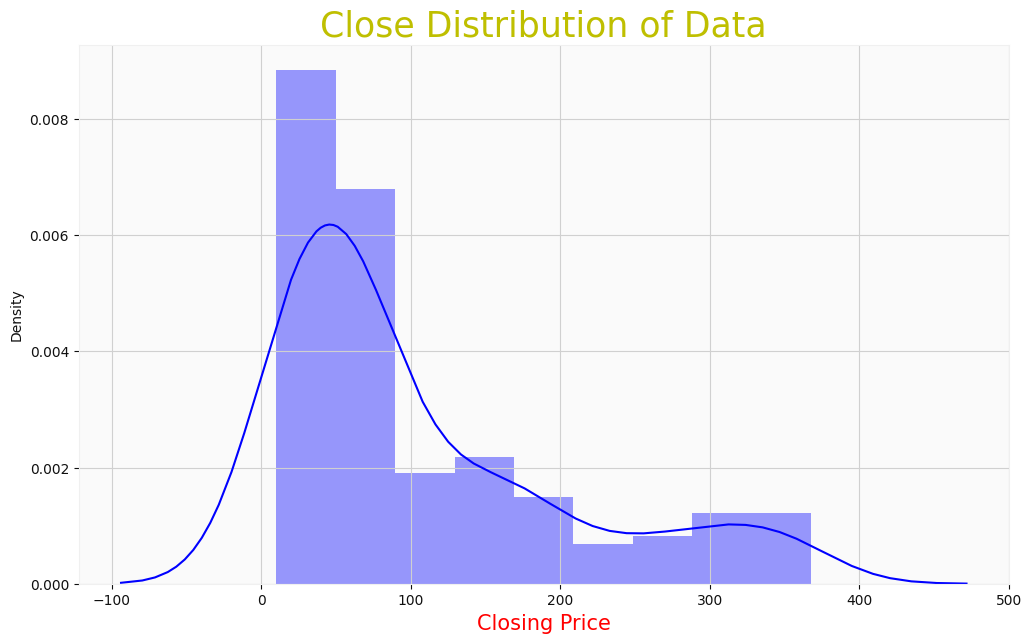

In [71]:
# Dependent variable 'Closing price'
plt.figure(figsize=(12,7))
sns.distplot(df['Close'],color="blue")
plt.title('Close Distribution of Data',color='y',fontsize=25)
plt.xlabel('Closing Price',color='r',fontsize=15)
plt.show()

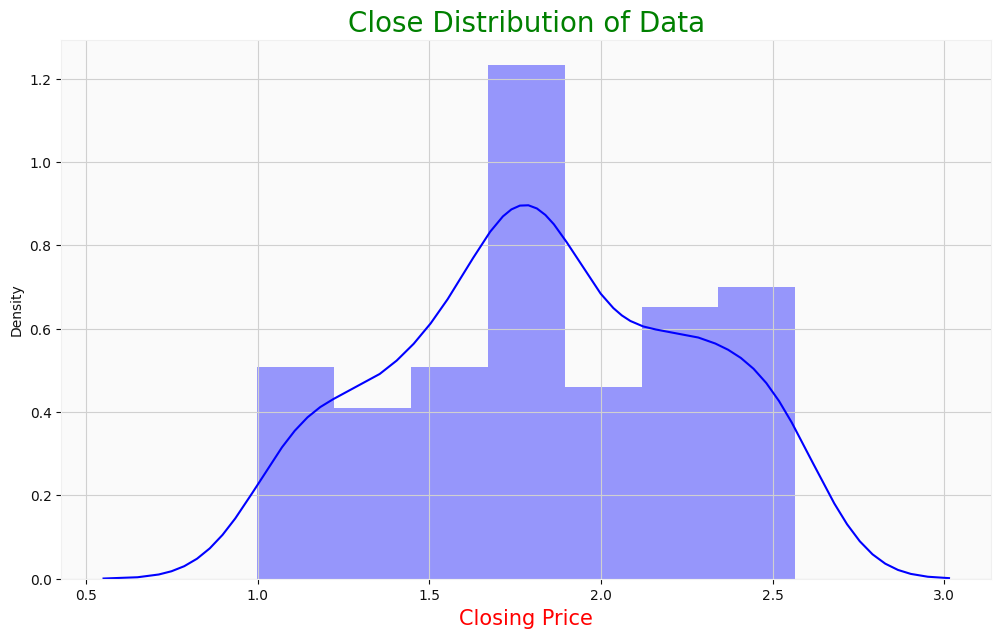

In [72]:
# Dependent variable 'Closing price'
plt.figure(figsize=(12,7))
sns.distplot(np.log10(df['Close']),color="blue")
plt.title('Close Distribution of Data',color='g',fontsize=20)
plt.xlabel('Closing Price',color='r',fontsize=15)
plt.show()

### **Corelation Check**

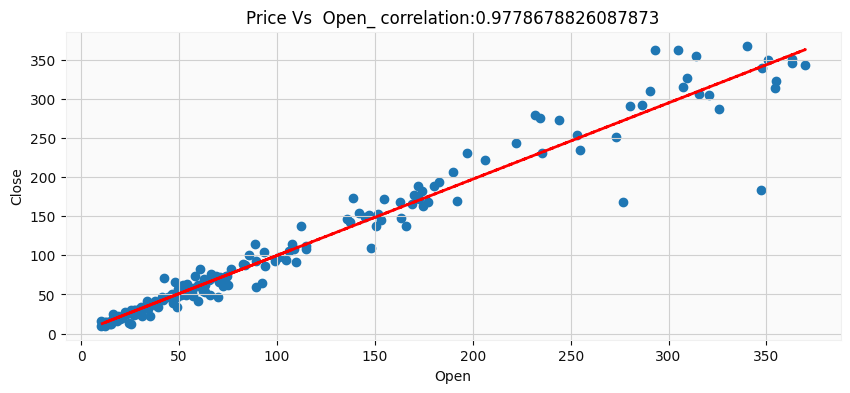

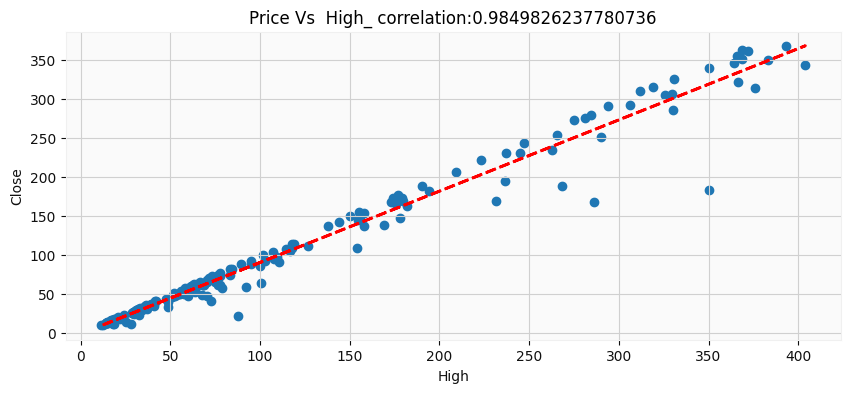

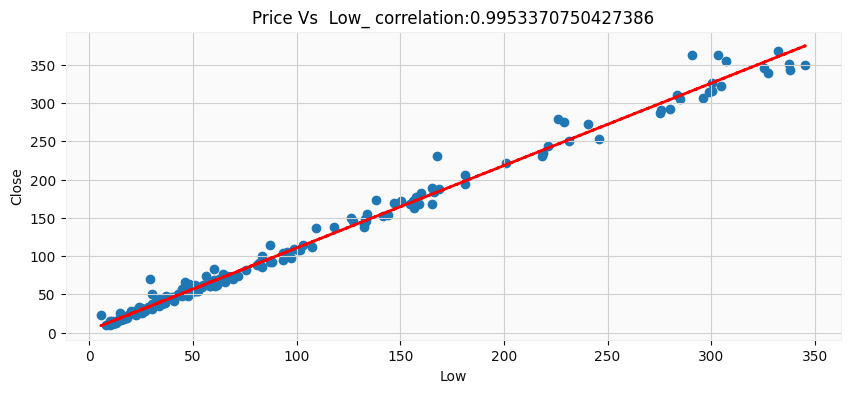

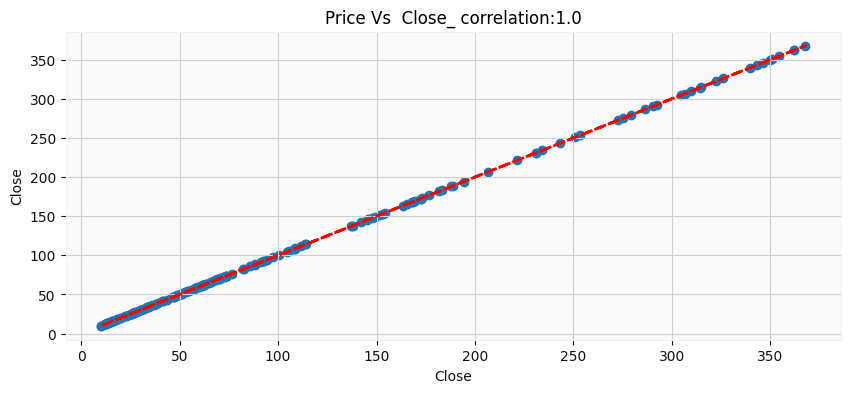

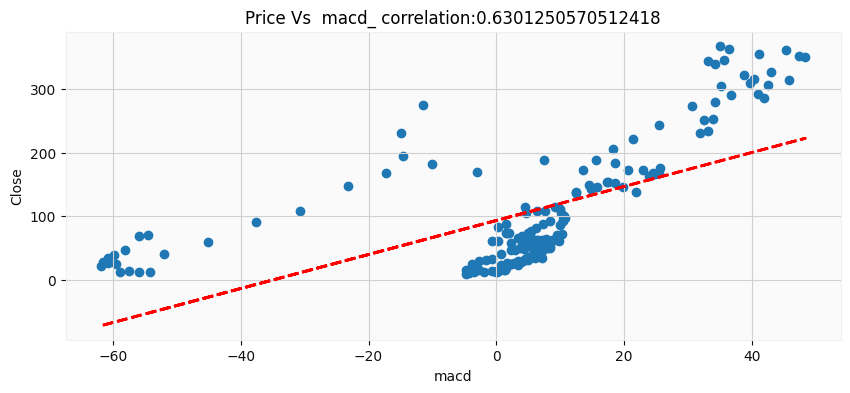

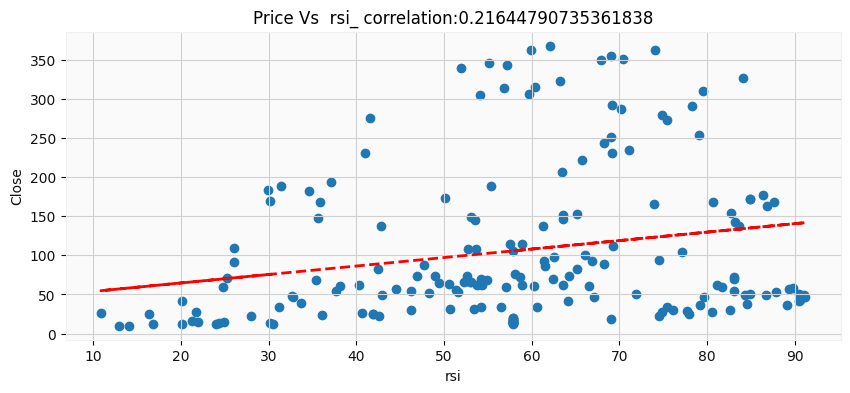

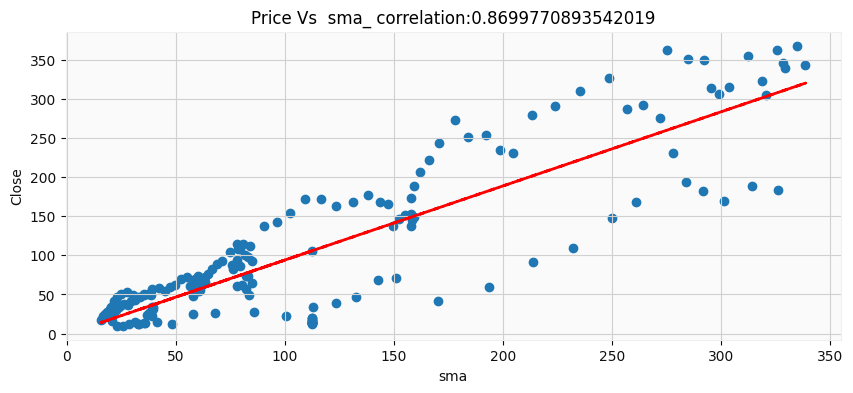

In [73]:
for col in df.columns:
  fig = plt.figure(figsize = (10,4))
  ax = fig.gca()
  features = df[col]
  label = df['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.title('Price Vs  ' + col + '_ correlation:' + str(correlation))
  z = np.polyfit(df[col],df['Close'],1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col] , y_hat, "r--",lw = 2)
plt.show()

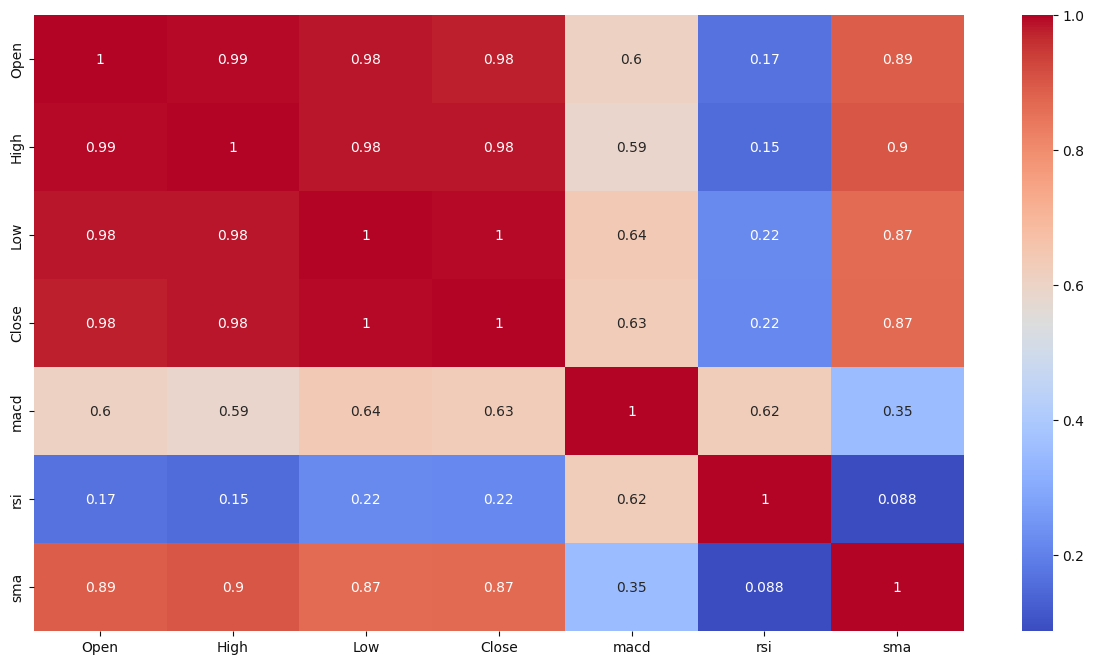

In [74]:
# Correaltion Between the Variables
corr = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(abs(corr),annot = True,cmap = 'coolwarm',linewidths=0.0)
plt.grid()
plt.show()

Now  you can look at how much each attribute correlates with Close value

In [75]:
corr=df.corr()
corr['Close'].sort_values(ascending=False)

Close    1.000000
Low      0.995337
High     0.984983
Open     0.977868
sma      0.869977
macd     0.630125
rsi      0.216448
Name: Close, dtype: float64

### **Creating training and testing data for all the models**

In [76]:

from sklearn.model_selection import cross_val_score, TimeSeriesSplit

# Importing everything from above
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)


def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [77]:
X = df.drop(columns=['Close']) #Independent variable's 

y = df['Close'] #Dependent Variable

# reserve 30% of data for testing
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(129, 6) (129,) (56, 6) (56,)


In machine learning, train_test_split() splits the data randomly, as there's no dependence from one observation to the other. That's not the case with time series data. Here, you'll want to use values at the rear of the dataset for testing and everything else for training.

### **Feature scaling**

For time series data like stock data, standardization is a common feature scaling technique. The reason is that standardization does not change the shape of the distribution of the data, which is important for time series data that may have trends and seasonality

In [78]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler object
scaler = StandardScaler()

# Fit and transform the dataset using StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## ***7. Select and Training Model***

At last! we Framed the problem, got the data and explore it, sample a training set and testing set.
we are now ready to select and train a machine learning model

#### Lets create some usefull function

In [79]:
#Define a function to plot all model prediction

def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False):
    """
        Plots modelled 
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(12, 6))
    plt.plot(prediction, label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    error = mape(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best",fancybox=True, shadow=True)
    plt.tight_layout()
    plt.grid(True);

In [80]:
#define function to plot coefficient for all model
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(12, 8))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

In [81]:
#Define  function to evaluate metrics on training set
def Training_Set_Performance(y_train, y_train_pred):
    mse = mean_squared_error(y_train, y_train_pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_train, y_train_pred)
    r2 = r2_score(y_train, y_train_pred)
    print(f"Train Set Performance:\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nR2: {r2:.4f}")

In [82]:
#Define  function to evaluate metrics on Test set
def Test_Set_Performance(y_test, y_test_pred):
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    print(f"Test Set Performance:\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nR2: {r2:.4f}")

#### **Linear Regression**

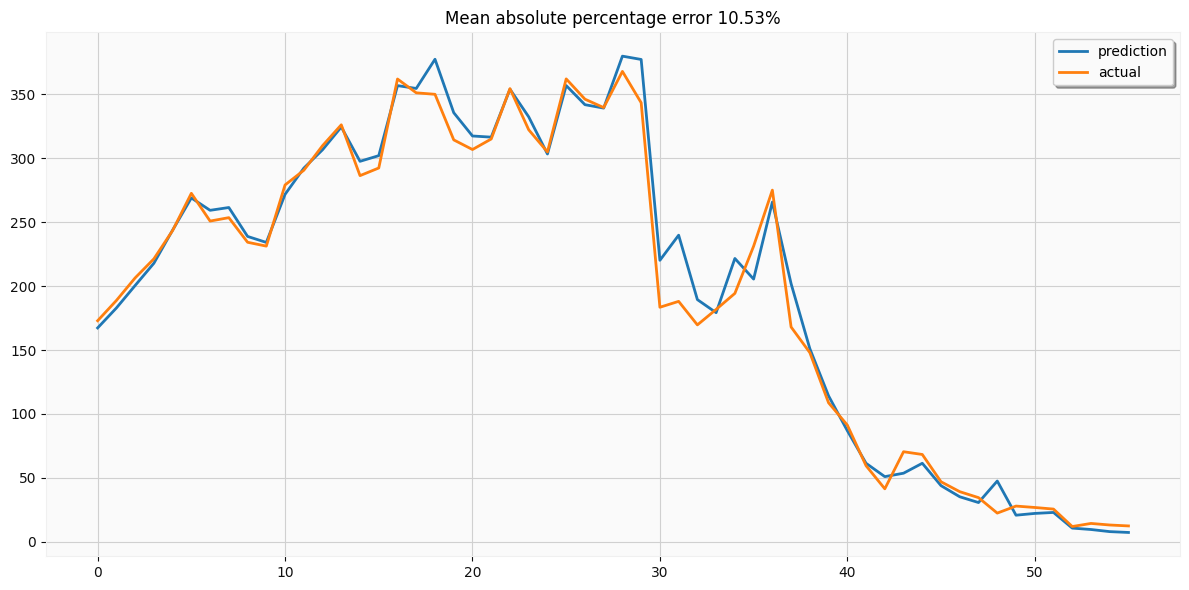

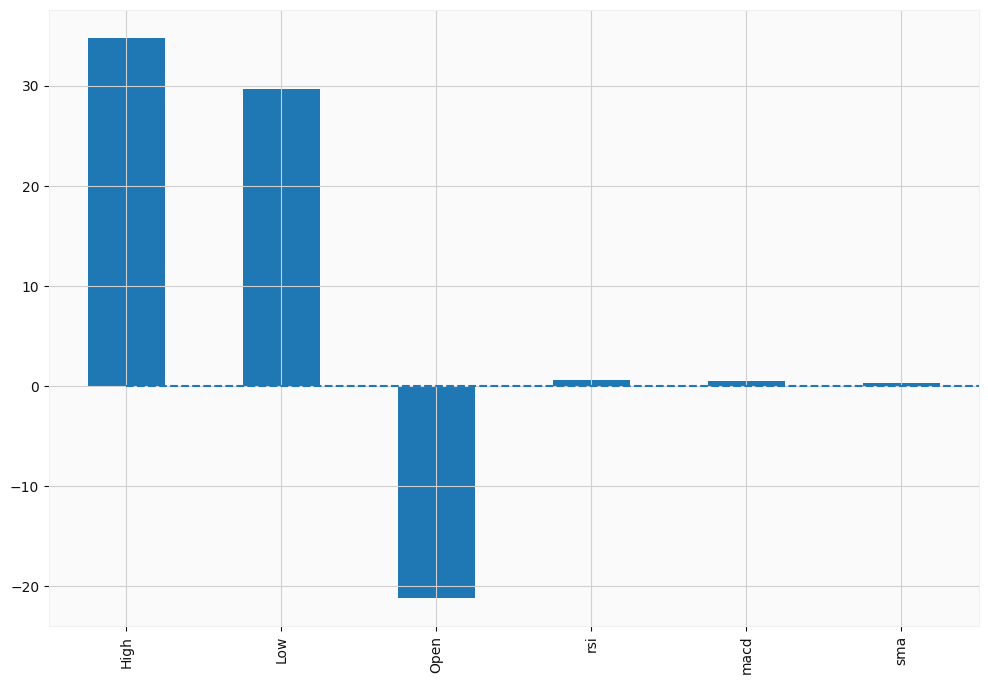

In [83]:
#Importing our model from library
from sklearn.linear_model import LinearRegression

# defining model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True)
plotCoefficients(lr)

In [84]:
#Prediction
y_test_pred = lr.predict(X_test_scaled)
y_train_pred = lr.predict(X_train_scaled)

In [85]:
Training_Set_Performance(y_train, y_train_pred)

Train Set Performance:
MSE: 11.4061
RMSE: 3.3773
MAE: 2.3415
R2: 0.9942


In [86]:
Test_Set_Performance(y_test, y_test_pred)

Test Set Performance:
MSE: 209.7539
RMSE: 14.4829
MAE: 9.6841
R2: 0.9853


#### **Ridge Linear Regression** 



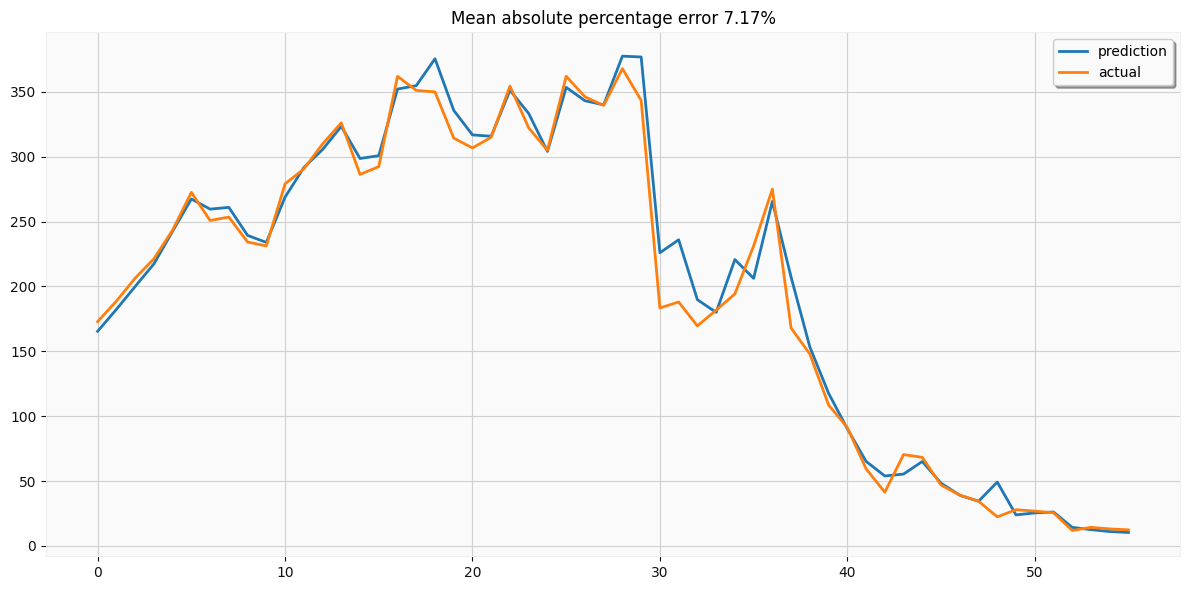

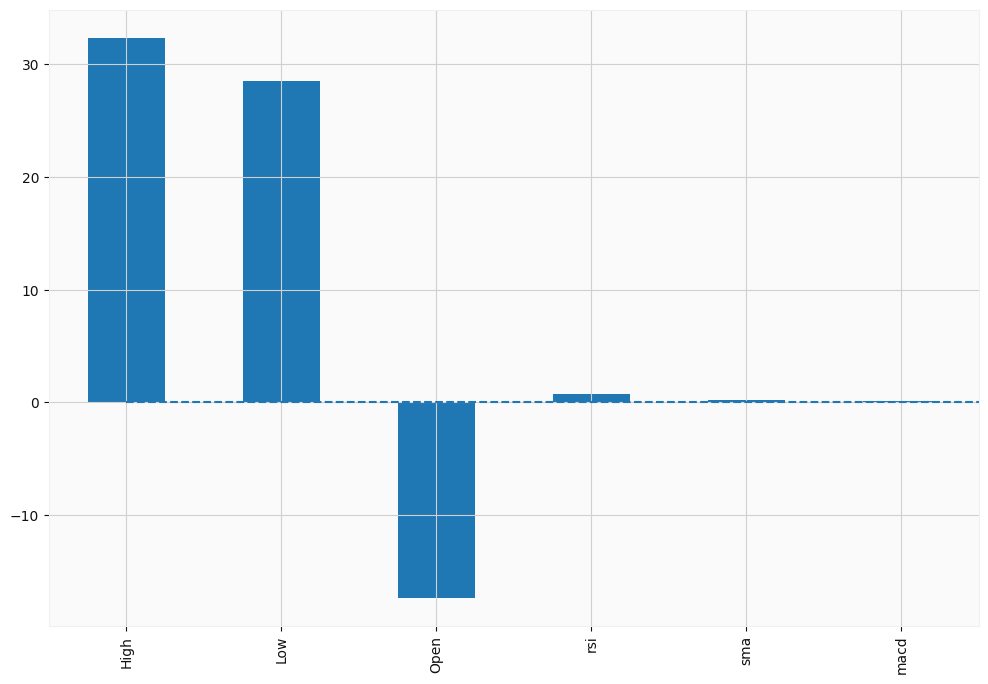

In [87]:
from sklearn.linear_model import RidgeCV 
# RidgeCV regression automatically selects the optimal value of λ by incorporating cross-validation
ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True)
plotCoefficients(ridge)

In [88]:
#Prediction
y_test_pred = ridge.predict(X_test_scaled)
y_train_pred = ridge.predict(X_train_scaled)

In [89]:
Training_Set_Performance(y_train, y_train_pred)

Train Set Performance:
MSE: 11.5429
RMSE: 3.3975
MAE: 2.3545
R2: 0.9941


In [90]:
Test_Set_Performance(y_test, y_test_pred)

Test Set Performance:
MSE: 218.0247
RMSE: 14.7657
MAE: 9.6661
R2: 0.9847


#### **Lasso Linear Regression** 

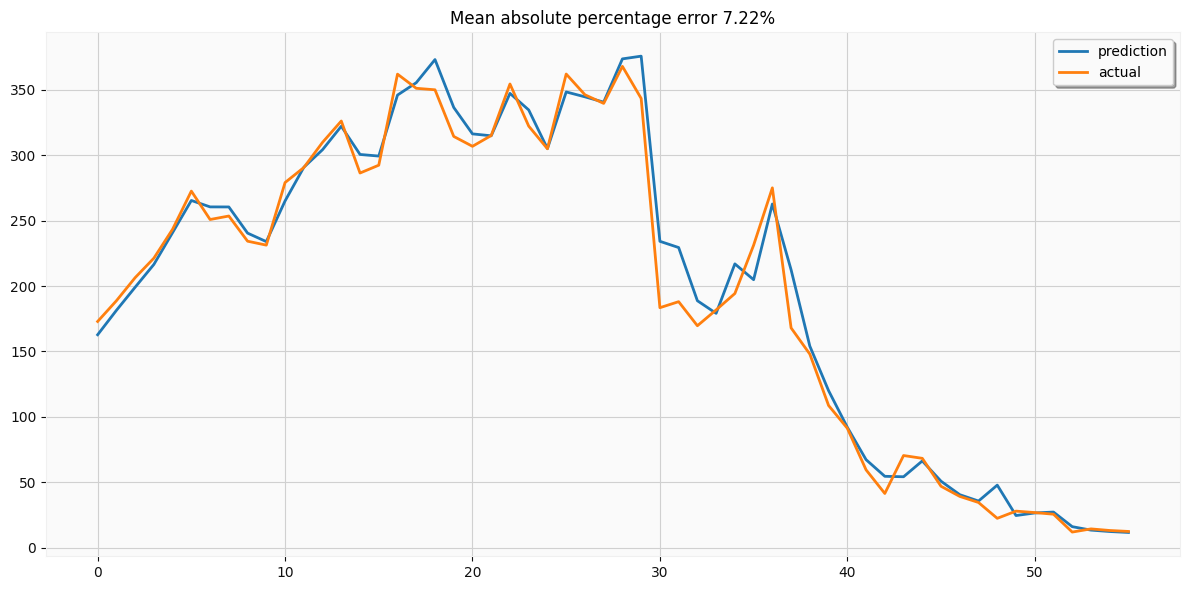

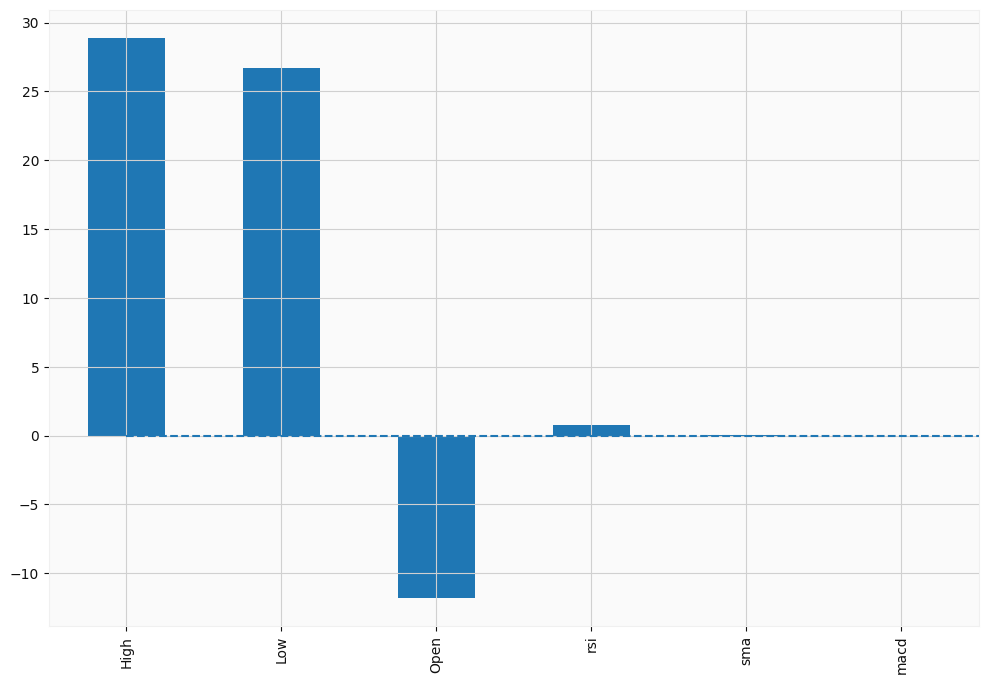

In [91]:
from sklearn.linear_model import LassoCV

#Using LassoCV instead of Lasso can improve the performance and stability of the model by automatically selecting the optimal hyperparameter value 
#Providing more reliable estimates of the model coefficients

lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True)
plotCoefficients(lasso)


In [92]:
#Prediction
y_test_pred = lasso.predict(X_test_scaled)
y_train_pred = lasso.predict(X_train_scaled)

In [93]:
Training_Set_Performance(y_train, y_train_pred)

Train Set Performance:
MSE: 12.2826
RMSE: 3.5047
MAE: 2.4548
R2: 0.9937


In [94]:
Test_Set_Performance(y_test, y_test_pred)

Test Set Performance:
MSE: 235.4382
RMSE: 15.3440
MAE: 10.3471
R2: 0.9835


#### **Elastic Net Linear Regression** 

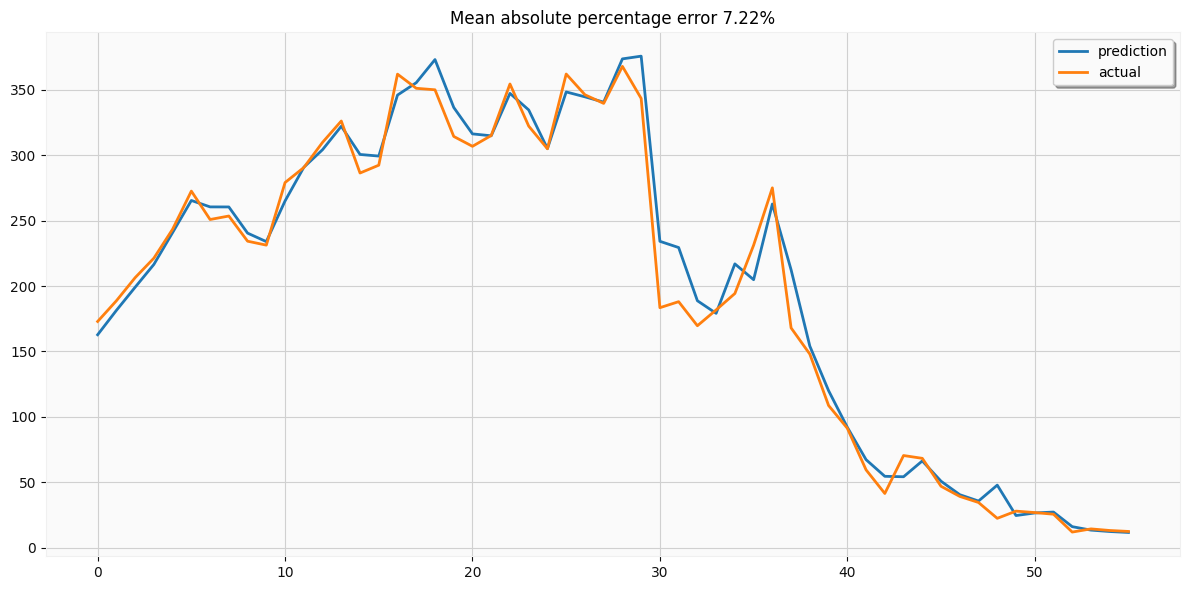

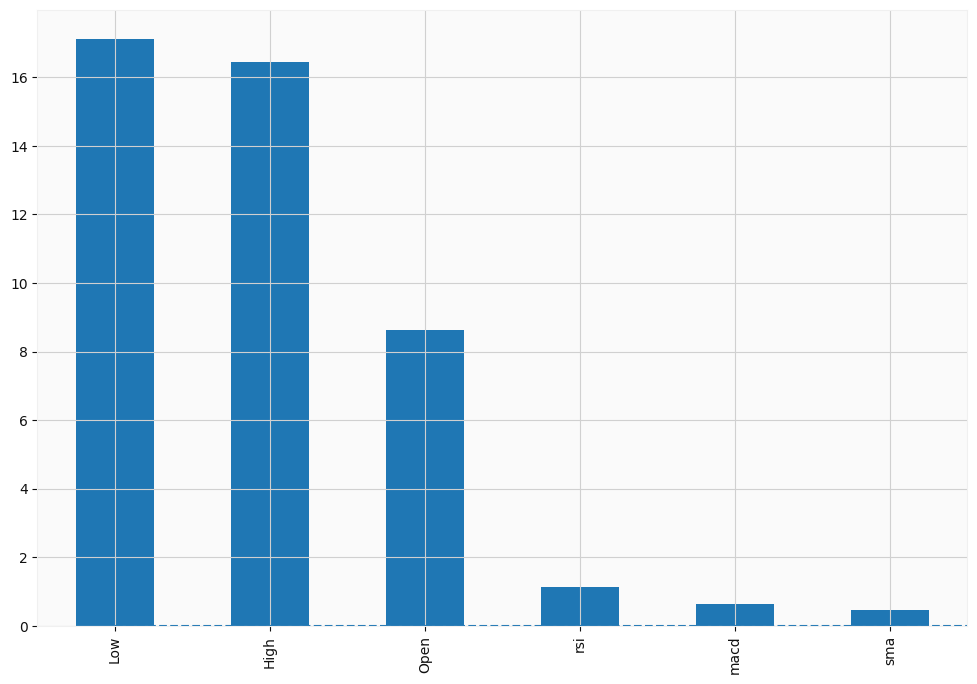

In [95]:
from sklearn.linear_model import ElasticNetCV

#It automatically selects the optimal values of the hyperparameters.
#Also more computationally efficient than using a grid search to explore the hyperparameter space

ElasticNet = ElasticNetCV(cv=tscv)
ElasticNet.fit(X_train_scaled,y_train)
plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True)
plotCoefficients(ElasticNet)


In [96]:
#Prediction
y_test_pred = ElasticNet.predict(X_test_scaled)
y_train_pred = ElasticNet.predict(X_train_scaled)

In [97]:
Training_Set_Performance(y_train, y_train_pred)

Train Set Performance:
MSE: 22.7772
RMSE: 4.7725
MAE: 3.4614
R2: 0.9884


In [98]:
Test_Set_Performance(y_test, y_test_pred)

Test Set Performance:
MSE: 416.9561
RMSE: 20.4195
MAE: 14.0417
R2: 0.9708


#### **Lets compare all model**

In [99]:
# Function to run all model 
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models
    
    i=0
    
    #Reading model one by one
    for model in models:
        model.fit(X_train,y_train)
        
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        #Computing evaluation metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        
        MAE=mean_absolute_error(y_test, y_pred_test)
        MSE=mean_squared_error(y_test, y_pred_test)
        RMSE=math.sqrt(MSE)
        MAPE=mape(y_test, y_pred_test)
        Rsquare=r2_score(y_test, y_pred_test)
        
        
        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"MAE"]=round(MAE,3)
        df.loc[i,"MSE"]=round(MSE,3)
        df.loc[i,"RMSE"]=round(RMSE,3)
        df.loc[i,"MAPE"]=round(MAPE,3)
        df.loc[i,"Rsquare"]=round(Rsquare,5)
        
        i+=1
    
    #Sorting values by accuracy
    df.sort_values(by=['Rsquare'],ascending=False,inplace=True)
    
    return df

In [100]:
models = [lr,lasso,ridge,ElasticNet]

In [104]:
#Testing performance
report=score_model(X_train,y_train,X_test,y_test)
report

,Model_Name,MAE,MSE,RMSE,MAPE,Rsquare
0,LinearRegression,9.684,209.754,14.483,10.221,0.98529
2,RidgeCV,9.663,210.160,14.497,10.016,0.98527
1,LassoCV,10.282,235.777,15.355,8.778,0.98347
3,ElasticNetCV,10.888,256.278,16.009,9.124,0.98203


Comparing above four model performance we observed all four model have high accuracies almost same.
we select nd finalize Linear regression model to perform further works.

## ***8.*** ***Future Work***

### 1. Perfect, we got the best model to launch! now we can deploy model to producion ready environment. For that we need to save the best model we trained, transfer the file to your production environment and load it. to save the model we can use joblib library

In [102]:
# Save the File
final_model = LinearRegression()
model = final_model.fit(X_train,y_train)
import joblib
joblib.dump(model, 'model_joblib.pkl')

['model_joblib.pkl']

### 2. Once model is transferred to production, we can load it nd use it to predict unseen data.

In [103]:
# Load the File and predict unseen data.
joblib_model = joblib.load('model_joblib.pkl')
joblib_model.predict([[100.990000	, 109.430000,	97.2000, 10.783847,	62.561422,83.227143]])


array([105.63482721])

## ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# ***Conclusions***

From the above data analysis, we can conclude that the stocks were closing at a high price until the fraud case by Rana Kapoor happened in 2018. 
Till then it was a great time period for people to invest in stocks of YES BANK but after that, a huge downtrend took place which resulted in a decline in the closing prices of the stocks.

From our linear regression model and the graph, we conclude that it can predict future stock prices with almost 98.5% accuracy.